In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Charan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df=pd.read_csv('Cleanedfile.csv')
df.head
documents=df['cleaned'].dropna().tolist()

In [8]:
def preprocess(text):
    tokens=word_tokenize(text.lower())
    stop_words=set(nltk.corpus.stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)

In [9]:
processed_docs=[preprocess(doc) for doc in documents]

In [10]:
sia=SentimentIntensityAnalyzer()
def sentiment_vader(text):
    return sia.polarity_scores(text)['compound']

In [11]:
vader_sentiments=[sentiment_vader(doc) for doc in processed_docs]

In [12]:
df['vader_sentiment']=vader_sentiments
df.head

<bound method NDFrame.head of      Unnamed: 0                                            reviews  \
0             0  ✅ Trip Verified |   Flight mainly let down by ...   
1             1  ✅ Trip Verified |   Another awful experience b...   
2             2  ✅ Trip Verified |   The service was rude, full...   
3             3  ✅ Trip Verified |   This flight was a joke. Th...   
4             4  ✅ Trip Verified |   This time British Airways ...   
..          ...                                                ...   
995         995  ✅ Trip Verified | Mahe to Stockholm via London...   
996         996  ✅ Trip Verified |  Glasgow to Tampa via Gatwic...   
997         997  Not Verified |  Orlando to Gatwick. Travelling...   
998         998  ✅ Trip Verified |  London to Abu Dhabi. This i...   
999         999  ✅ Trip Verified |  London to St Petersburgh. H...   

                                               cleaned  vader_sentiment  
0    trip verified flight mainly let disagreeable f... 

In [13]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

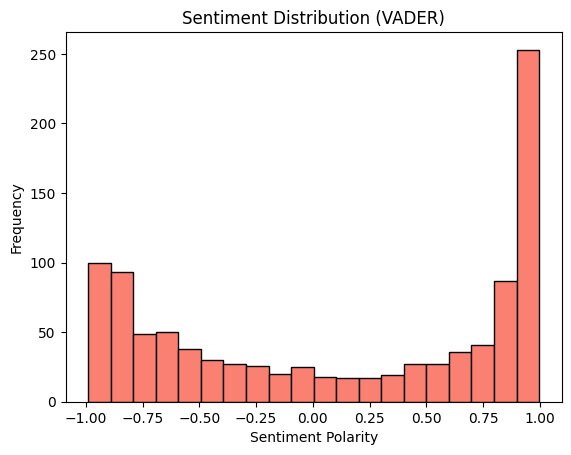

In [14]:
plt.hist(df['vader_sentiment'],bins=20,color='salmon',edgecolor='black')
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")